In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('results.csv')
df.head()

,Type,Metric,Easy,Medium,Hard,Extra,All
0,Embedded Grammar,Count,470.000,857.000,463.000,357.000,2147.000000
1,Embedded Grammar,Attempts,NaN,NaN,NaN,NaN,3578.000000
2,Embedded Grammar,Execution Time (s),NaN,NaN,NaN,NaN,31749.000000
3,Embedded Grammar,Avg time per question (s),NaN,NaN,NaN,NaN,14.787611
4,Embedded Grammar,Execution Accuracy,0.072,0.152,0.086,0.078,0.108000


In [3]:
# if value on Easy	Medium	Hard	Extra	All calumns is less than 1, multiply by 100
df['Easy'] = df['Easy'].apply(lambda x: x*100 if x < 1 else x)
df['Medium'] = df['Medium'].apply(lambda x: x*100 if x < 1 else x)
df['Hard'] = df['Hard'].apply(lambda x: x*100 if x < 1 else x)
df['Extra'] = df['Extra'].apply(lambda x: x*100 if x < 1 else x)
df['All'] = df['All'].apply(lambda x: x*100 if x < 1 else x)

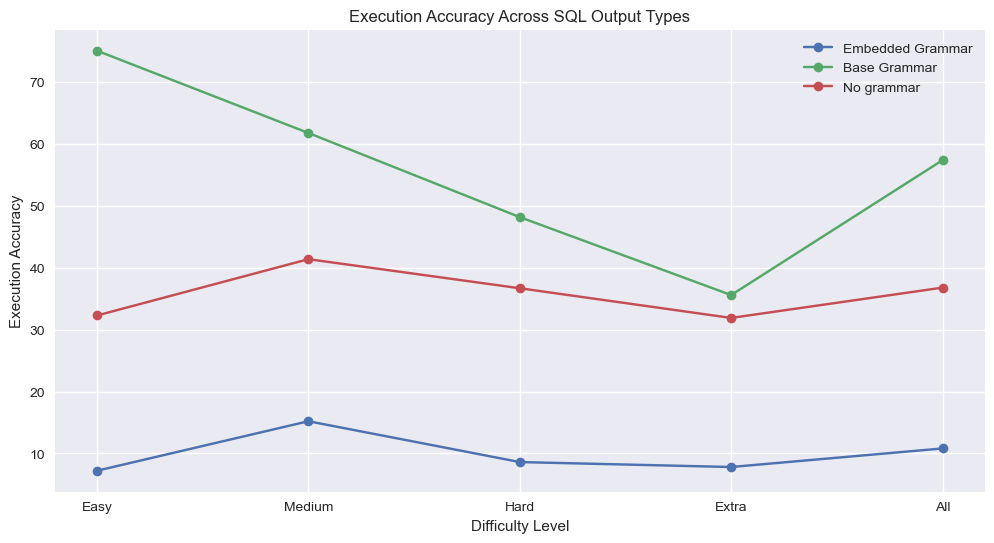

In [23]:
# Filter data for Execution Accuracy
execution_accuracy_df = df[df['Metric'] == 'Execution Accuracy']
#plot style
plt.style.use('seaborn-v0_8')
# Plot Execution Accuracy

plt.figure(figsize=(12, 6))
for type_ in execution_accuracy_df['Type'].unique():
    subset = execution_accuracy_df[execution_accuracy_df['Type'] == type_]
    plt.plot(subset.columns[2:], subset.values[0][2:], marker='o', label=type_)

plt.title('Execution Accuracy Across SQL Output Types')
plt.xlabel('Difficulty Level')
plt.ylabel('Execution Accuracy')
plt.legend()
plt.grid(True)
plt.show()

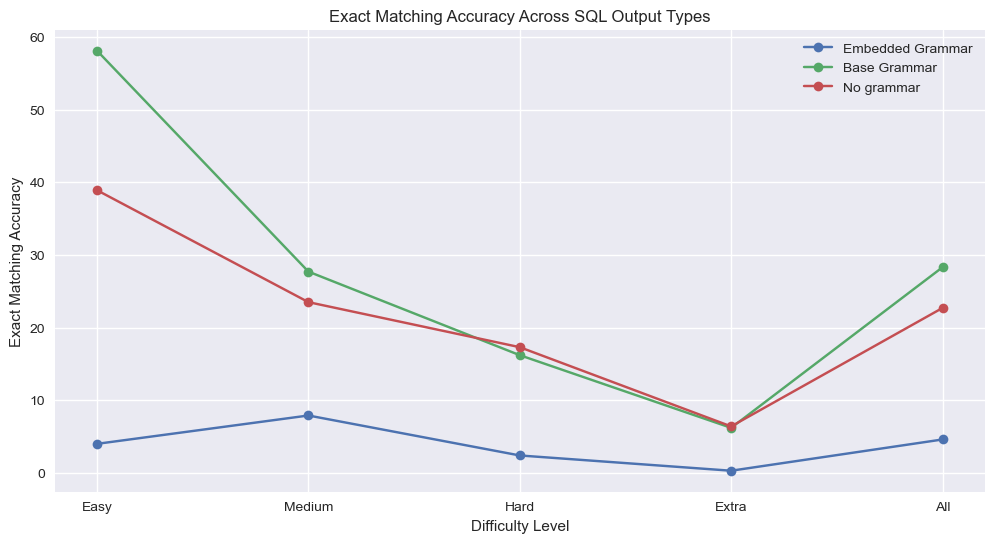

In [24]:
# Filter data for Execution Accuracy
exact_accuracy_df = df[df['Metric'] == 'Exact Matching Accuracy']
plt.style.use('seaborn-v0_8')
# Plot Execution Accuracy

plt.figure(figsize=(12, 6))
for type_ in exact_accuracy_df['Type'].unique():
    subset = exact_accuracy_df[exact_accuracy_df['Type'] == type_]
    plt.plot(subset.columns[2:], subset.values[0][2:], marker='o', label=type_)

plt.title('Exact Matching Accuracy Across SQL Output Types')
plt.xlabel('Difficulty Level')
plt.ylabel('Exact Matching Accuracy')
# set3 as color palette
plt.legend()
plt.grid(True)
plt.show()

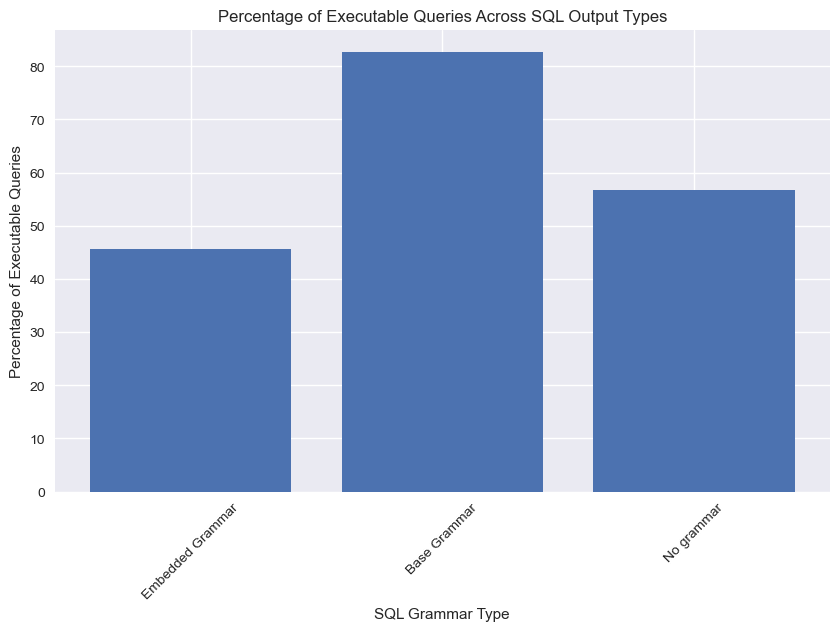

In [26]:
# Filter data for the "% of executable queries" metric
executable_queries_data = df[df['Metric'] == '% of executable queries']

# Create a bar chart for the "All" column
plt.figure(figsize=(10, 6))
plt.bar(executable_queries_data['Type'], executable_queries_data['All'])
plt.xlabel('SQL Grammar Type')
plt.ylabel('Percentage of Executable Queries')
plt.title('Percentage of Executable Queries Across SQL Output Types')
plt.xticks(rotation=45)
plt.show()

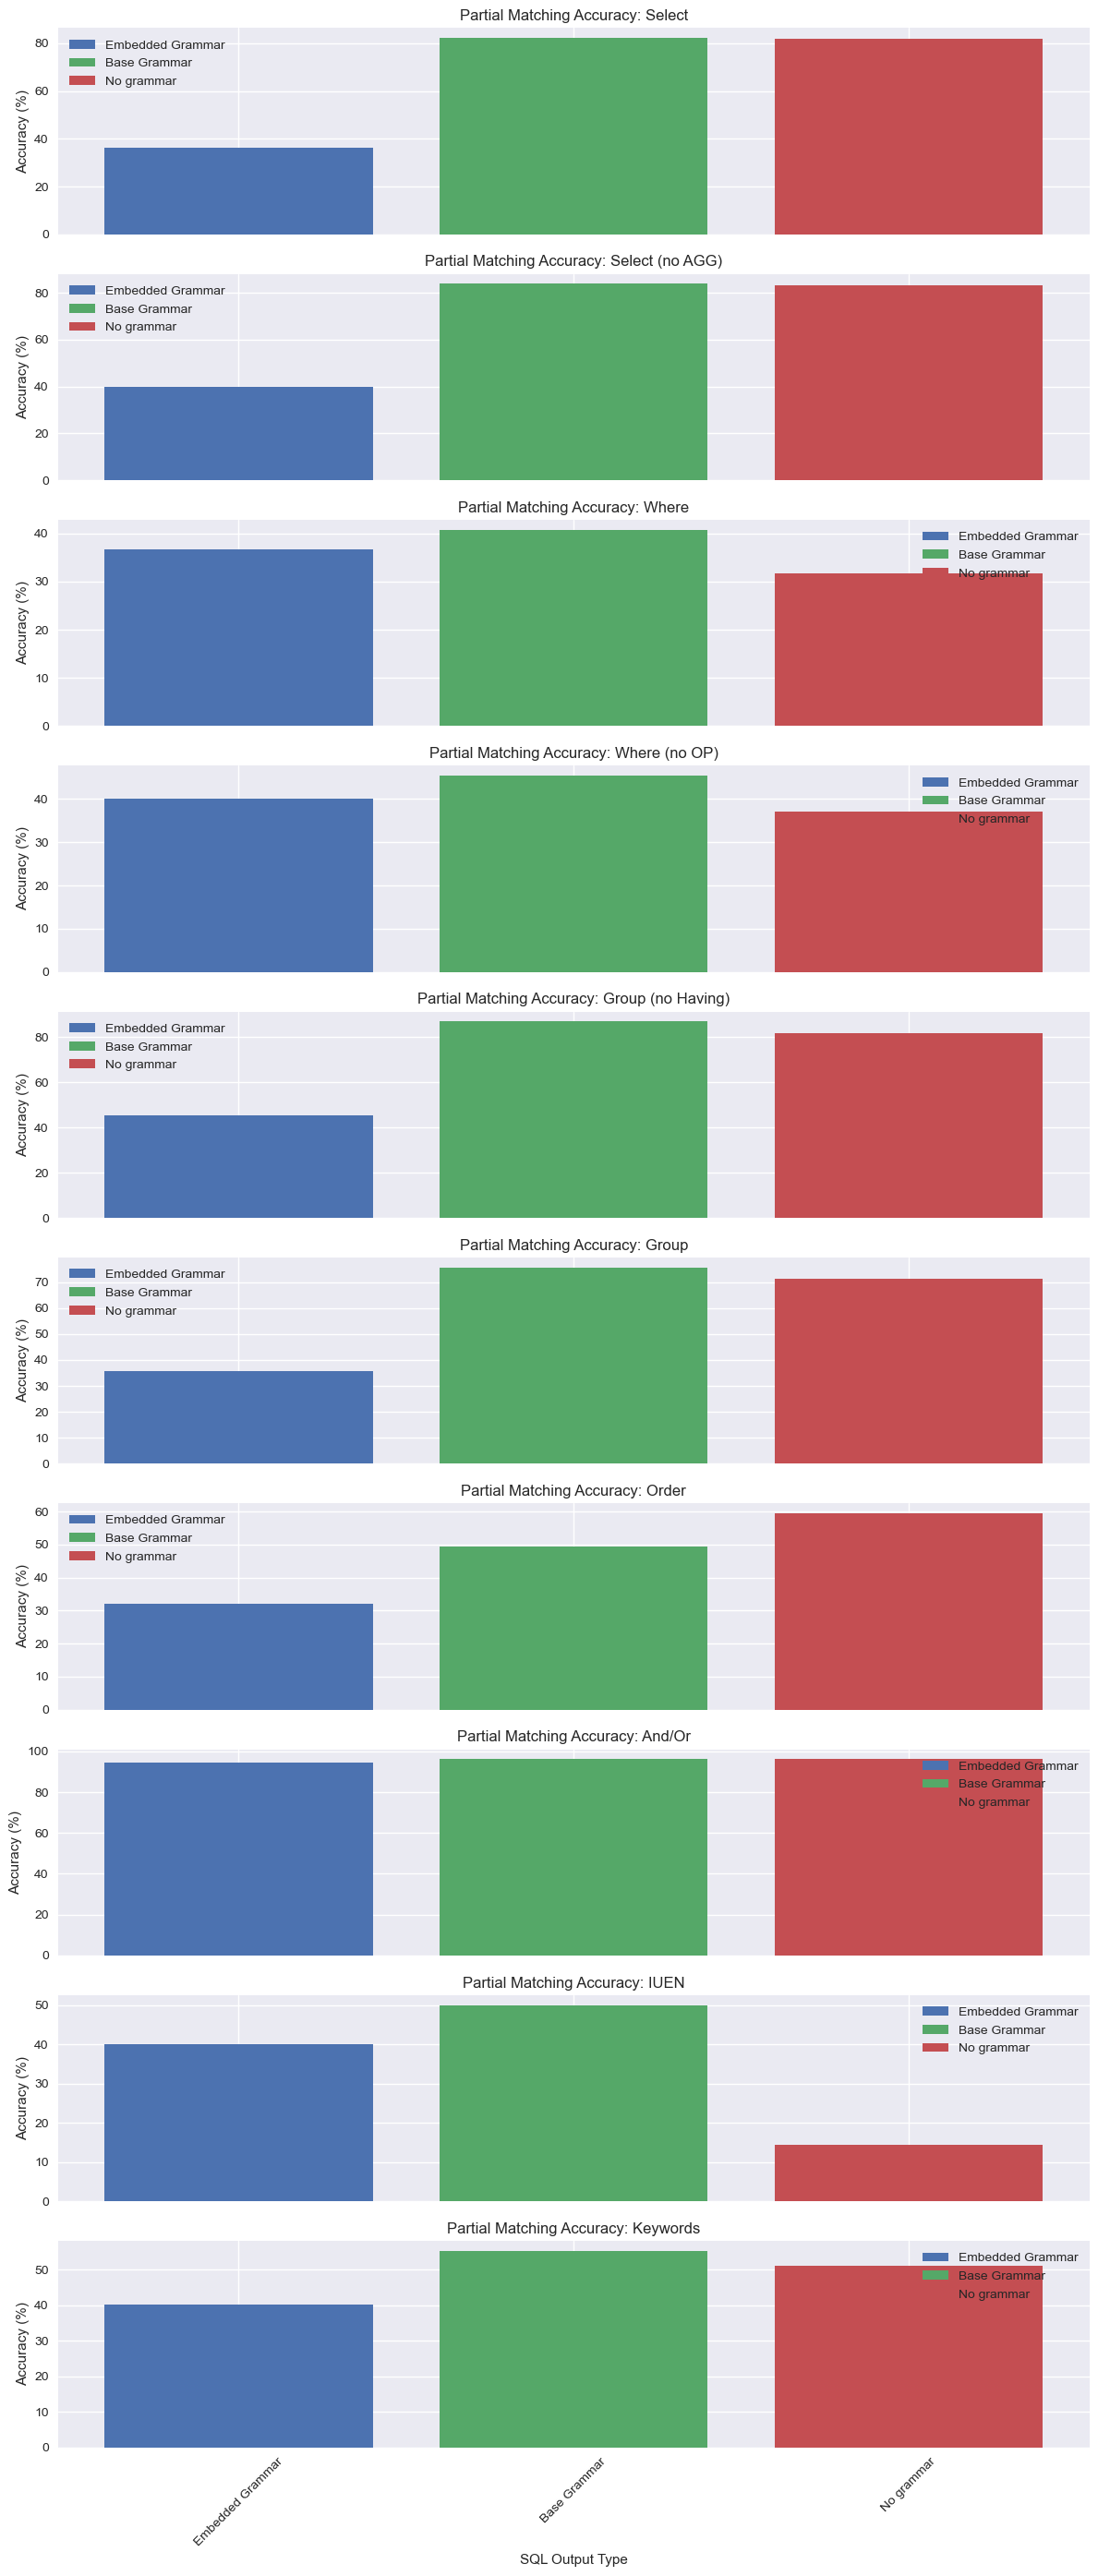

In [27]:
# Filter data for the Partial Matching Accuracy metrics
partial_matching_data = df[df['Metric'].str.contains('Partial Matching Accuracy')]

# Separate the partial matching accuracy metrics
partial_metrics = partial_matching_data['Metric'].unique()

fig, axes = plt.subplots(len(partial_metrics), 1, figsize=(12, 28), sharex=True)

for i, metric in enumerate(partial_metrics):
    metric_data = partial_matching_data[partial_matching_data['Metric'] == metric]
    for grammar_type in metric_data['Type'].unique():
        grammar_data = metric_data[metric_data['Type'] == grammar_type]
        axes[i].bar(grammar_data['Type'], grammar_data['All'], label=grammar_type)
    axes[i].set_title(metric)
    axes[i].set_ylabel('Accuracy (%)')
    axes[i].legend()

axes[-1].set_xlabel('SQL Output Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


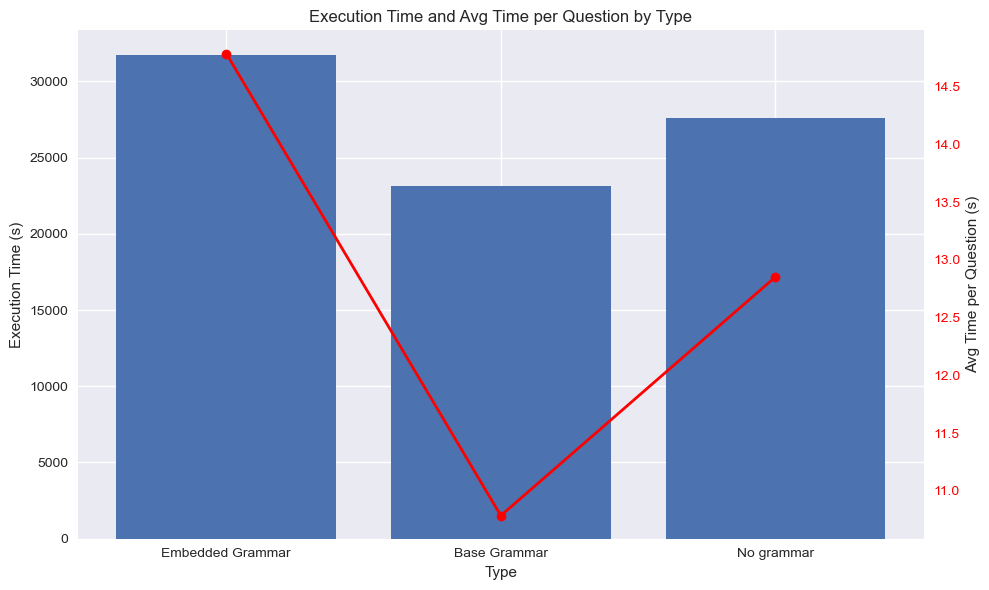

In [22]:
# Filter the relevant data for the "All" column and specific metrics
execution_time_data = df.loc[df['Metric'] == 'Execution Time (s)', ['Type', 'All']]
avg_time_data = df.loc[df['Metric'] == 'Avg time per question (s)', ['Type', 'All']]

# Plotting the Execution Time with a bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(execution_time_data['Type'], execution_time_data['All'])
ax1.set_xlabel('Type')
ax1.set_ylabel('Execution Time (s)')
ax1.tick_params(axis='y', )

# Adding the Avg Time per Question on the secondary y-axis with a line chart
ax2 = ax1.twinx()
ax2.plot(avg_time_data['Type'], avg_time_data['All'], color='r', marker='o', linewidth=2)
ax2.set_ylabel('Avg Time per Question (s)')
ax2.tick_params(axis='y', labelcolor='r')
#hide grid
ax2.grid(False)

plt.title('Execution Time and Avg Time per Question by Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
ax2.plot(avg_time_data['Type'], avg_time_data['All'], color='r', marker='o', linewidth=2)
ax2.set_ylabel('Avg Time per Question (s)')
ax2.tick_params(axis='y', labelcolor='r')
#hide grid
ax2.grid(False)

plt.title('Execution Time and Avg Time per Question by Type')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

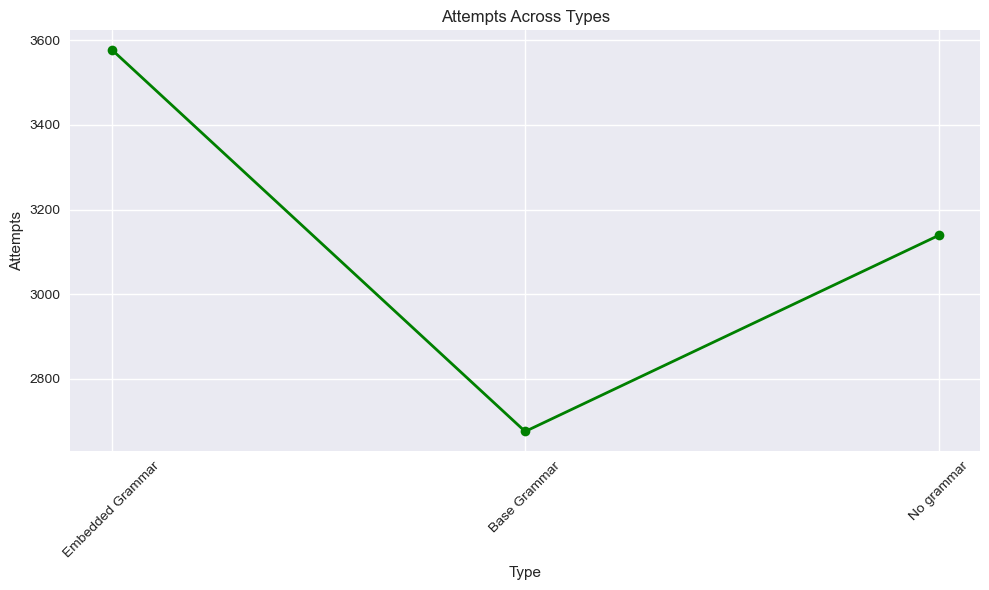

In [20]:
# Filter the relevant data for the "All" column and specific metrics (Attempts)
attempts_data = df.loc[df['Metric'] == 'Attempts', ['Type', 'All']]

# Plotting the line chart for Attempts
plt.figure(figsize=(10, 6))
plt.plot(attempts_data['Type'], attempts_data['All'], marker='o', linestyle='-', color='green', linewidth=2)

plt.title('Attempts Across Types')
plt.xlabel('Type')
plt.ylabel('Attempts')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
